In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#print(data.head(5))
labels=data['label']
#print(labels)
given_data=data.drop("label",axis=1)

In [4]:
#print(labels.shape)
#print(given_data.shape)

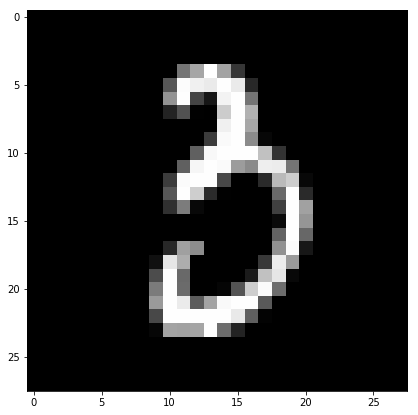

In [5]:
plt.figure(figsize=(7,7))
index= 150

griddata=np.asmatrix((given_data.iloc[index]).values).reshape(28,28)
#gd=np.mat(given_data.iloc[index])
#print()
plt.imshow(griddata,interpolation="none",cmap="gray")
plt.show()

#print(labels[index])

In [6]:
#print(given_data.mean(axis=0))
mean_data = data.groupby('label', as_index=False).mean()
#print(mean_data)
mean_data=mean_data.drop("label",axis=1)
#print(mean_data)

In [7]:
cnt=0
min_dist=0
curr_label=0
for index1, row1 in mean_data.iterrows():
    #print(row1.shape)
    #print(((given_data.iloc[index]).values).shape)
    current_dist=(row1-(given_data.iloc[index]).values).dot((row1-(given_data.iloc[index]).values).T)
    print(current_dist,index1)
    if(cnt==0):
        curr_label=index1
        min_dist=current_dist
    else:
        if(current_dist<min_dist):
            curr_label=index1
            min_dist=current_dist
    
    cnt+=1
#print(curr_label)     

3790583.4484192505 0
3287164.0971866907 1
3512355.1009395765 2
2327953.197376384 3
4251059.812694678 4
2676057.3787513217 5
3274757.092648577 6
3723463.7669787095 7
3298113.7781361234 8
3993317.0629058303 9


In [8]:
df = pd.DataFrame(columns=['ImageId','Label'])

#df = df.append({'ImageId': 1, 'Label': 9}, ignore_index=True)
#df = df.append({'ImageId': 1, 'Label': 9}, ignore_index=True)
#print(df)

In [9]:
cnt=0

for index, row in test_data.iterrows():
    cnt=0
    min_dist=0
    curr_label=0
    for index1, row1 in mean_data.iterrows():
        #print(row1.shape)
        #print(((given_data.iloc[index]).values).shape)
        current_dist=(row1-row).dot((row1-row).T)
        #print(current_dist,index1)
        if(cnt==0):
            curr_label=index1
            min_dist=current_dist
        else:
            if(current_dist<min_dist):
                curr_label=index1
                min_dist=current_dist
        cnt+=1
    df = df.append({'ImageId': index+1, 'Label': curr_label}, ignore_index=True)
    #print(index+1,curr_label)
df.to_csv('testResult', encoding='utf-8', index=False)            
#print(test_data.shape)